# The goal of this project is to build a machine learning algorithm to predict house prices as accurately as possible.  We were given the King County House Sales dataset to work with.  Through data exploration and cleaning I am confident I have found the best features that have a high correlation with the price and have built an accurate multivariate linear regression model.

In [147]:
import pandas as pd #For data exploration
#These next few packages are for statistical computation and model building
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from statsmodels.formula.api import ols
#Seaborn and matplotlib are for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#This line of code is so the visualizations will show in the notebook
%matplotlib inline 
pd.set_option('display.max_columns', None)#Checking all column names in dataframe
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [148]:
#Newest house built was in 2015
#The most bathrooms a house has is 8 but 70% of houses have between a bath and 3 quaters and a two and a half bath.
#And 70% of the houses have between 3 and 4 bedrooms.
#Most of the houses do not have a waterfront view.
#The average number of bedrooms were 3 when rounded down, and the average number of bathrooms were 2.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [149]:
#Using the info method to check total number of rows and any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


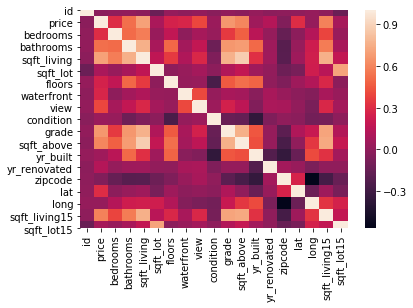

In [150]:
#Visualizing the correlation between features
sns.heatmap(df.corr())

In [151]:
#Re-checking the column names
df.keys()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

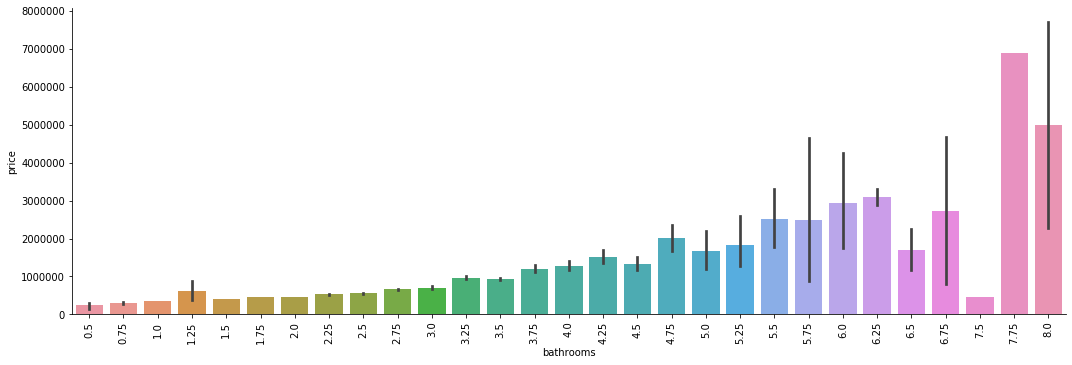

In [152]:
#I googled bathroom sizes and found this http://www.rempros.com/dimensions/bathroom_sizes.html 
#and then wanted to graph the diiferent sizes.
g = sns.catplot('bathrooms', 'price',  data = df, kind='bar', aspect=3)
g.set_xticklabels(rotation=90)

In [153]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


# I chose waterfront as one of my features because if I was buying a house, if it had a waterfront view I would still purchase it no matter what.

In [154]:
df['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [155]:
#Some of the values in sqft_basement are '?'
#Lets use the mean to replace these values
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
946.0         1
2400.0        1
1481.0        1
2390.0        1
2180.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [156]:
#replacing missing data in sqft_basement with column mean 
sqft_basement_numerical = df.sqft_basement[df.sqft_basement != '?']
sqft_basement_numerical = sqft_basement_numerical.astype(float)
sqft_basement_numerical_mean = round(sqft_basement_numerical.mean(),1)
df['sqft_basement'] = (df['sqft_basement'].map(lambda x: sqft_basement_numerical_mean if x == '?' else x)).astype(float)

In [157]:
#Checking to see if our code worked
df['sqft_basement'].value_counts()

0.0       12826
291.9       454
600.0       217
500.0       209
700.0       208
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [158]:
df['sqft_basement'].astype(int)

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int32

In [159]:
df['view'].isnull().sum()

63

In [160]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [161]:
df['view'].fillna(0, inplace=True)

# In order to change the view data type to an interger I first had to fill the null values, then change the datatype to a float and then an integer.

In [162]:
df['view'].astype(float)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21592    0.0
21593    0.0
21594    0.0
21595    0.0
21596    0.0
Name: view, Length: 21597, dtype: float64

In [163]:
df['view'].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: view, Length: 21597, dtype: int32

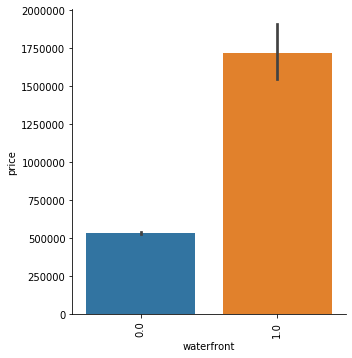

In [164]:
#Visually inspecting the amount of houses with and without waterfront views
g = sns.catplot('waterfront', 'price',  data = df, kind='bar', aspect=1)
g.set_xticklabels(rotation=90)

In [165]:
#I replaced all the null value in waterfront with 0 because the was the most frequent value
df['waterfront'].fillna(0, inplace=True)

In [166]:
df['waterfront'].isnull().sum()

0

In [167]:
#Making a series to check correlation between each feature and price for easier visualization
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.322192
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

# These are all the features I decided to use.

* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **zipcode** - zip
* **lat** - Latitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [168]:
X = df[['sqft_living', 'bathrooms', 'bedrooms', 'sqft_living15','floors', 'sqft_above','sqft_lot15', 'grade','waterfront', 'lat', 'yr_built', 'sqft_basement', 'view', 'zipcode']]
y = df.price

In [169]:
#Price was heavily skewed so I applied a log transformation
y = np.log(y)

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1000)

In [172]:
lr = LinearRegression(normalize=True)

In [173]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [174]:
#Intercept when all inputs are 0
lr.intercept_

16.396178702658222

In [175]:
#Negative and positive relationships of predictors and the target variable
#It seems like bedrooms, sqft_lot15, and yr_built have a negative relationship on the sale of the house
#By adding the zipcode as a feature, even though it has a negative relationship, the r-squared value went up a little
#and changed the y-intercept to positive
lr.coef_

array([ 1.28134015e-04,  7.94752755e-02, -1.38266455e-02,  8.79945908e-05,
        7.70613611e-02, -6.40108534e-07,  7.53713516e-08,  1.65155979e-01,
        3.73607377e-01,  1.37733127e+00, -4.45118649e-03,  3.22122120e-05,
        6.53801349e-02, -6.32672886e-04])

In [176]:
prediction = lr.predict(X_test)

In [177]:
sklearn.metrics.r2_score(y_test, prediction)

0.7764602224102777

In [178]:
#Using cross validation so the test set covers the whole original dataset.
cross_val = cross_val_predict(lr, X, y)

C:\Users\willi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [179]:
cross_val

array([12.56982787, 13.298938  , 12.94805102, ..., 12.42945834,
       12.85393934, 12.43378228])

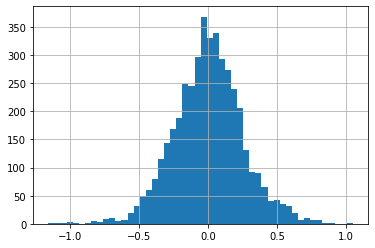

In [180]:
#Plotting residuals(difference) btw real target set and predicted target set
(y_test - prediction).hist(bins=50)

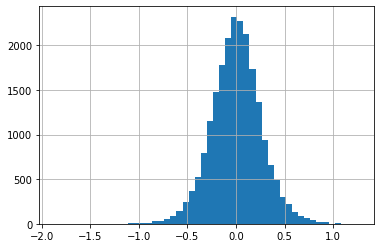

In [181]:
#Plotting residuals(difference) btw real target set and predicted target set after cross validation
(y - cross_val).hist(bins=50)

No handles with labels found to put in legend.


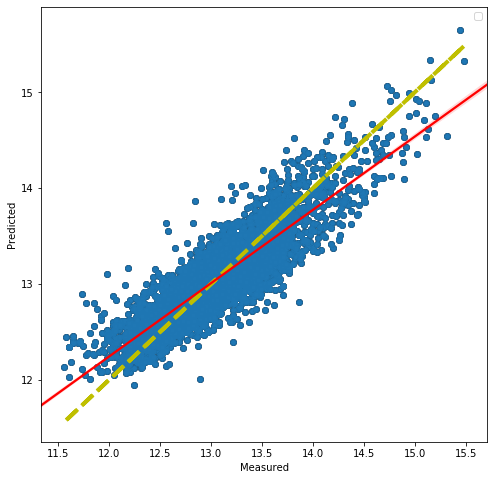

In [182]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test, prediction, edgecolors=(0, 0, 0))
ax.plot(y_test, y_test, 'k--', lw=4, color='y')
sns.regplot(x=y_test, y=prediction, ax=ax, line_kws={"color": "red"})
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.legend()

In [183]:
#Splitting data up further
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train, y_train, test_size=0.10, random_state=7)

In [184]:
lr2 = lr.fit(X_train_2, y_train_2)

In [185]:
lr2.intercept_

13.77647542423347

In [186]:
lr2.coef_

array([ 1.20192864e-04,  7.93650912e-02, -1.32687597e-02,  9.06425486e-05,
        7.68903799e-02,  7.09832294e-06,  1.40915774e-07,  1.63310861e-01,
        3.65168474e-01,  1.37762564e+00, -4.41988897e-03,  4.08231766e-05,
        6.58860267e-02, -6.06669302e-04])

In [187]:
prediction2 = lr.predict(X_test_2)

In [188]:
sklearn.metrics.r2_score(y_test_2, prediction2)

0.7744478089197819

No handles with labels found to put in legend.


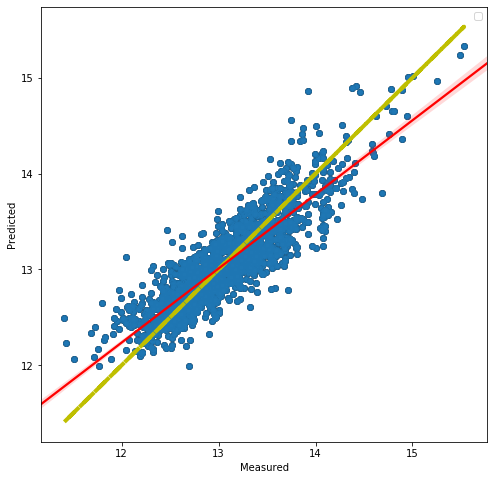

In [189]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y_test_2, prediction2, edgecolors=(0, 0, 0))
ax.plot(y_test_2, y_test_2, 'k--', lw=4, color='y')
sns.regplot(x=y_test_2, y=prediction2, ax=ax, line_kws={"color": "red"})
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.legend()

In [190]:
df['price'] = np.log(df['price'])

In [191]:
target = 'price'
predictor = X
pred_sum = '+'.join(predictor)
formula = target + '~' + pred_sum

In [192]:
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     4985.
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:26:25   Log-Likelihood:                -1209.2
No. Observations:               21597   AIC:                             2448.
Df Residuals:                   21582   BIC:                             2568.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.3991      3.660      3.388      0.001       5.226      19.572
sqft_living       0.0001    2.7e-05      4.955      0.000    8.08e-05       0.000
bathrooms         0.0783      0.004     19.017      0.000       0.070       0.086
bedrooms         -0.0113      0.002     -4.675      0.000      -0.016      -0.007
sqft_living15  8.584e-05   4.33e-06     19.842      0.000    7.74e-05    9.43e-05
floors            0.0738      0.005     16.223      0.000       0.065       0.083
sqft_above    -2.683e-06    2.7e-05     -0.099      0.921   -5.55e-05    5.02e-05
sqft_lot15     1.276e-07   6.66e-08      1.915      0.055   -2.99e-09    2.58e-07
grade             0.1657      0.003     61.105      0.000       0.160       0.171
waterfront        0.3842      0.023     16.675      0.000       0.339       0.429
lat               1.3700      0.014    100.759      0.000       1.343       1.397
yr_built         -0.0044   8.13e-05    -53.704      0.000      -0.005      -0.004
sqft_basement  2.961e-05    2.7e-05      1.098      0.272   -2.33e-05    8.25e-05
view              0.0650      0.003     24.109      0.000       0.060       0.070
zipcode          -0.0006   3.77e-05    -15.640      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      458.666   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1007.000
Skew:                          -0.050   Prob(JB):                    2.15e-219
Kurtosis:                       4.053   Cond. No.                     2.08e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""